In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

def get_img(col):
    img = np.zeros((28,28))
    for t in range(1,785):
        j = t // 28
        i = t - 28*j
        img[j - 1, i - 1] = col[t - 1, 0]

    return img

def display_10dig(Wd):
    w=28
    h=28
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 2

    for k in range(1, columns*rows +1):
        img = display(Wd[:,k - 1:k])
        fig.add_subplot(rows, columns, k)
        plt.imshow(img, interpolation='nearest')
    plt.show()
    
def display(Wd):
    
    width=28
    height=28
    rows = 1
    cols = 5
    axes=[]
    fig=plt.figure(figsize=(20, 10))

    for a in range(rows*cols):
        b = get_img(Wd[:, a: a + 1])
        axes.append( fig.add_subplot(rows, cols, a+1) )
        subplot_title=("Coluna "+str(a))
        axes[-1].set_title(subplot_title)
        plt.axis('off')  
        plt.imshow(b)
    fig.tight_layout()    
    plt.show()

24.66503405570984



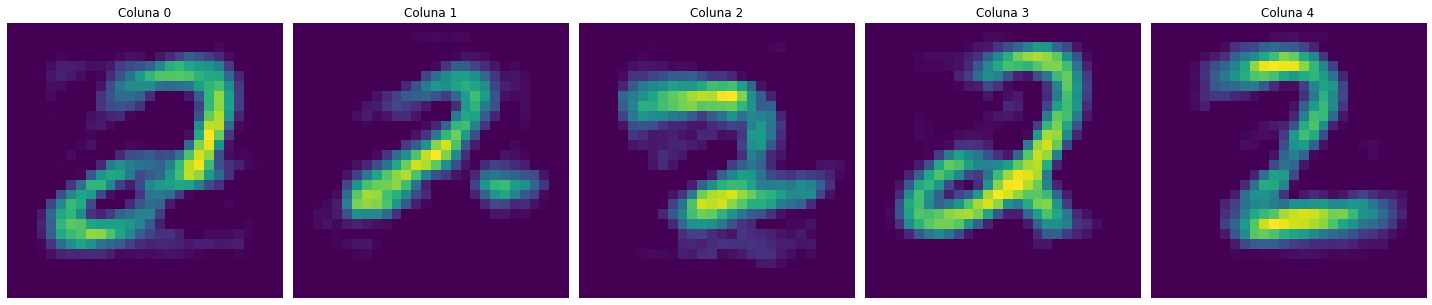

In [17]:
import numpy as np

with open("dig_treino/W_2_100_5.txt") as file:
    time = file.readline()
    print(time)
    B = np.loadtxt(file)
    display(B)

# Gráficos para discussão

In [3]:
def get_data():
    data = [[],[],[]]
    ndig = [100, 1000, 4000]
    ps = [5, 10, 15]

    for x in range(len(ps)):
        for y in range(len(ndig)):
            report = "reports/report_{}_{}.txt".format(ndig[y], ps[x])
            
            with open(report, "r") as f:
                    lines = f.readlines()
                    data[y].append(float(lines[2][-7:-2]))

    return data[0], data[1], data[2]



In [4]:
import re
def get_data1(ndig, p):
    report = "reports/report_{}_{}.txt".format(ndig, p)
    
    with open(report, "r", encoding="utf-8") as f:
        lines = f.read().replace('\n', ' ')
        matched = re.findall('[0-9]+\.[0-9]+', lines)
        matched = matched[1:]
        for index in range(len(matched)):
            matched[index] = float(matched[index])
        return matched
    
get_data1(100, 5)

[97.24, 99.38, 85.27, 86.34, 84.22, 83.74, 93.01, 88.04, 80.39, 87.91]

In [5]:
with open("reports/report_100_5.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    print(lines[2][-7:])

88.73%



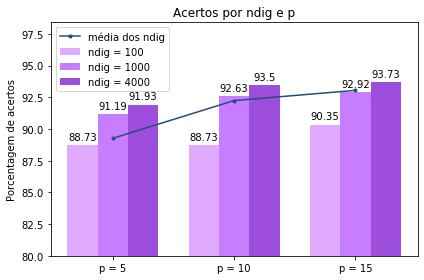

In [7]:
import matplotlib
import numpy as np

def data_mean(data):
    y = []

    for p in data:
        y.append((p[0] + p[1] + p[2])/3)
    return y

labels = ['p = 5','p = 10','p = 15']
data1, data2, data3 = get_data()
#print(data1, data2, data3)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
y = data_mean([data1, data2, data3])

mean = ax.plot([0,1,2], y,'.-', color='#274c77', label="média dos ndig")

rects1 = ax.bar(x - width, data1, width, label='ndig = 100', fc='#e0aaff')
rects2 = ax.bar(x, data2, width, label='ndig = 1000', fc='#c77dff')
rects3 = ax.bar(x + width, data3, width, label='ndig = 4000', fc='#9d4edd')

ax.set_ylabel('Porcentagem de acertos')
ax.set_title('Acertos por ndig e p')
ax.set_ylim(ymin=80)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig('figuras/acerto_ndig_p.png', dpi=150)
plt.show()

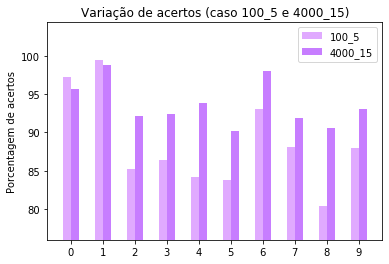

In [11]:
fig1, ax1 = plt.subplots()

p1 = 5
p2 = 15

ndig1 = 100
ndig2 = 4000

caso1 = get_data1(ndig1,p1)
caso2 = get_data1(ndig2,p2)

labels = ['0','1','2','3','4','5','6','7','8','9']
x = np.arange(len(labels))  # the label locations
width = 0.25


rects1 = ax1.bar(x - width/2, caso1, width, label='{}_{}'.format(ndig1,p1), fc='#e0aaff')
rects2 = ax1.bar(x + width/2, caso2, width, label='{}_{}'.format(ndig2,p2), fc='#c77dff')

ax1.set_ylabel('Porcentagem de acertos')
ax1.set_title('Variação de acertos (caso {}_{} e {}_{})'.format(ndig1, p1, ndig2, p2))
ax1.set_ylim(ymin=76)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax1.legend(loc=1)
plt.savefig('figuras/acertos-{}_{}-{}_{}.png'.format(ndig1, p1, ndig2, p2), dpi=150)
plt.show()

In [9]:
import numpy as np

# depende dos erros e do onde errou
def get_k_rank(k, ndig, p, digito):
    # inicializa o dicionário
    topk_digitos = {}
    for i in range(1, k+1):
        topk_digitos[i] = {}
        
    with open('dados_mnist/test_index.txt') as f:
        asw = np.loadtxt(f, dtype=np.int8)
    
    erros = np.loadtxt('erros/erros_{}_{}.txt'.format(ndig, p))
    
    with open('erros/onde_errou_{}_{}.txt'.format(ndig, p), "r") as f:
        # iterando pelos erros
        for pos in f.readlines():
            pos = (int(float(pos)))
            d = asw[pos]
            
            if d == digito: # apenas olho para o digito escolhido
                erro_d = {}
                for val in range(10):
                    erro_d[erros[val, pos]] = val    
                erro_d = sorted(erro_d.items()) # ordena os erros
                #print(erro_d)
                
                for i in range(0, k):
                    dl = erro_d[i][1]
                    
                    if dl not in topk_digitos[i + 1]: # inicializa os valores
                        topk_digitos[i + 1][dl] = 1
                    else:
                        topk_digitos[i + 1][dl] += 1 # faz o update
                        
                #print(topk_digitos)
                
        return topk_digitos
import matplotlib.pyplot as plt

def autolabel_deluxe(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def plot_top_k(topks, k, ndig, p, digito, preset):
    labels = ['0','1','2','3','4','5','6','7','8','9']
    
    fig, ax = plt.subplots(preset[0], preset[1], figsize=(13,6))
    
    plt.subplots_adjust(top=0.9)
    fig.tight_layout(pad=2.0) # distância entre os plots
    plt.subplots_adjust(hspace=1)
    fig.suptitle('Histogramas do top {} digitos chutados no lugar do {}'.format(k, digito), size=15, y=1.05)
    
    for i in range(k):
        rect = ax[i].bar(list(topks[i + 1].keys()), topks[i + 1].values(), width=0.5, color='#c77dff')
        autolabel_deluxe(rect, ax[i])
        ax[i].set_title('{}º posição'.format(i + 1), size=14)
        
        ax[i].set_ylabel('Frequência', size=14)
        x = np.arange(len(labels))  # the label locations
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(labels)
        
    plt.savefig('figuras/top_{}-digito_{}-{}_{}.png'.format(k, digito, ndig, p), dpi=150)
    plt.show()

In [31]:
def create_top_plots(k=3, ndig=100, p=5, digito=0, preset=(1,3)): # preset define como dispor as imagens (depende de k)
    topks = get_k_rank(k,ndig,p,digito)
    plot_top_k(topks,k,ndig,p,digito,preset)

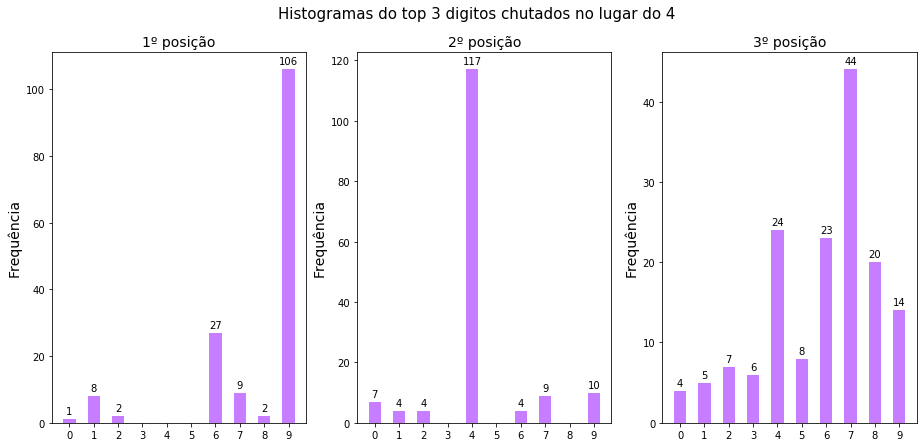

In [40]:
create_top_plots(ndig = 100, p = 5, digito=4)